### Libraries

In [15]:
import os, shutil
import matplotlib.pyplot as plt
from matplotlib.widgets import Cursor
%matplotlib widget
import matplotlib.cbook as cbook
from cycler import cycler          

import numpy as np
import pandas as pd


### Initalising CSV files after simulation is completed

In [16]:

# paths of all csv files and capture names of tests
data_dir = os.getcwd() + "\\all_simulations" # Directory where test folders are stored
test = os.listdir(data_dir)

# dict key is test name, entry is csv
data = {}
for i in range(len(test)):
    csv_path = f'{data_dir}\\{test[i]}\\{test[i]}.csv'
    data[test[i]] = pd.read_csv(csv_path)

### Preparing variables of interest for graphing and analysis
* add new index manually, get names of variables from plots in PSCAD

In [17]:

signals = data[test[0]].columns.to_list()
print(signals)
pbess_idx = data[test[0]].columns.get_loc('P - Bus 33A')
fbus_idx = data[test[0]].columns.get_loc('f - Bus 33A')
fgrid_idx = data[test[0]].columns.get_loc('f - grid (33kV)')
time_idx = data[test[0]].columns.get_loc('TIME')
t = data[test[0]].TIME
print(len(data[test[0]].iloc[:, pbess_idx]))

['TIME', 'Vrms - Bus 33A', 'Vphase - Bus 33A:1', 'Vphase - Bus 33A:2', 'Vphase - Bus 33A:3', 'Vline - Bus 33A:1', 'Vline - Bus 33A:2', 'Vline - Bus 33A:3', 'Current - Bus 33A:1', 'Current - Bus 33A:2', 'Current - Bus 33A:3', 'P - Bus 33A', 'Q - Bus 33A', 'Vrms - Grid (33kV)', 'Vphase - Grid:1', 'Vphase - Grid:2', 'Vphase - Grid:3', 'Current - Grid:1', 'Current - Grid:2', 'Current - Grid:3', 'P - grid (+: from Thevenin source)', 'Q - grid (+: from Thevenin source)', 'f - grid (33kV)', 'f - Bus 33A', 'fgrid_Ref', '|Vderr|', '|Vqerr|', 'f Grid', 'VqGrid', 'VdGrid', 'SCLBase', 'Rp', 'Grid_1:SCLBase', 'Rs', 'Lp', 'Vphase - BESS:1', 'Vphase - BESS:2', 'Vphase - BESS:3', 'Vline - BESS:1', 'Vline - BESS:2', 'Vline - BESS:3', 'Current - BESS:1', 'Current - BESS:2', 'Current - BESS:3', 'P - BESS', 'Q - BESS', 'f - 33kV', 'Vrms - BESS', '|Vderr|_1', '|Vqerr|_1', 'f Grid_1', 'VqGrid_1', 'VdGrid_1', 'fref', 'V_DC', 'I_DC', 'P_dc', 'Untitled', 'Converter LV currents (VSC side):1', 'Converter LV curr

### Test plot

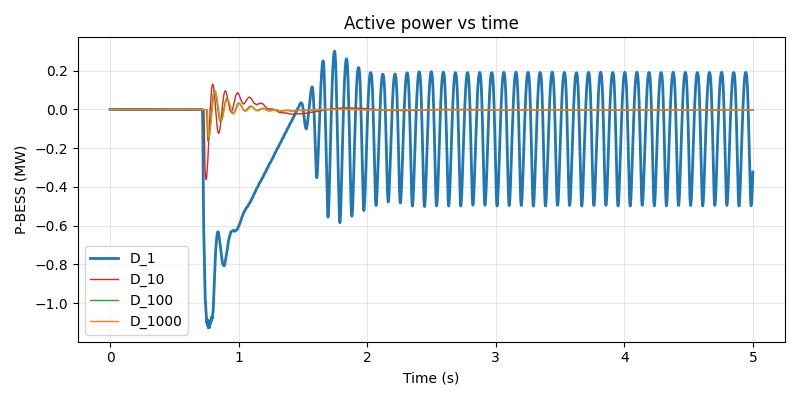

In [18]:
fig, ax = plt.subplots(figsize=(8, 4))

ax.set_prop_cycle(
    cycler(color=       ['tab:blue', 'tab:red', 'tab:green', 'tab:orange', 'tab:brown']) +
    cycler(linestyle=   ['-', '-', '-', '-','-']) +
    cycler(marker=      ['', '', '', '','']) +
    cycler(linewidth=   [2, 1, 1, 1,1])
)

for test_name, df in data.items():
    p = df.iloc[:, pbess_idx]
    ax.plot(t, p, label=test_name)
    #f = df.iloc[:, fbus_idx]
    #ax.plot(t, 0.2*(f-50), label=f'{test_name} + f')

ax.set_xlabel('Time (s)')
ax.set_ylabel('P-BESS (MW)')
ax.set_title('Active power vs time')
ax.legend()
ax.grid(alpha=0.3)

Cursor(ax, useblit=True, color='grey', linewidth=0.6)
ax.format_coord = lambda x, y: f"t={x:0.2f} s, P={y:0.3f} MW"

plt.tight_layout()
plt.show()
